In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Graph
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import plotly.express as px
from datetime import date 
from wrangle import new_city_data, clean_city, missing_zero_values_table, train_validate_test_split
import explore

In [2]:
df = new_city_data()

In [3]:
df = clean_city(df)

In [4]:
df.head(2)

,annual_salary_2016,base_pay_2016,leave_payout_2016,other_2016,overtime_2016,gross_earnings_2016,additional_compensation,total_compensation,department,gender,...,years_employed,job_id,job_name,ethnicity_ASIAN,ethnicity_BLACK,ethnicity_HISPANIC,ethnicity_NATIVE AMERICAN,ethnicity_NATIVE HAWAIIAN,ethnicity_OTHER,ethnicity_WHITE
REF #,,,,,,,,,,,,,,,,,,,,,
12,185251.0,180826.0,6718.0,10908.0,0.0,198452.0,42837.0,241289.0,SOLID WASTE MANAGEMENT,MALE,...,14,1087,SOLID WASTE MANAGEMENT DIRECTOR,0,1,0,0,0,0,0
13,187536.0,183056.0,10202.0,6840.0,0.0,200099.0,40607.0,240705.0,CONVENTION & SPORTS FACILITIES,MALE,...,18,1010,CSF DIRECTOR,0,0,0,0,0,0,1


In [5]:
df.ethnicity.value_counts()

HISPANIC           7446
WHITE              3390
BLACK               787
ASIAN               141
OTHER                87
NATIVE AMERICAN      46
NATIVE HAWAIIAN      13
Name: ethnicity, dtype: int64

In [6]:
df.shape

(11910, 21)

In [7]:
df[['total_compensation', 'years_employed']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_compensation,11910.0,81364.377330,52090.840869,0.0,46400.75,68788.0,127947.75,241289.0
years_employed,11910.0,15.564484,9.148673,5.0,7.00,14.0,22.00,53.0


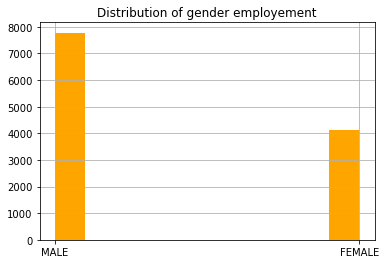

In [8]:

df['gender'].hist(color='orange', figsize=(6,4))

plt.title('Distribution of gender employement')
plt.show()

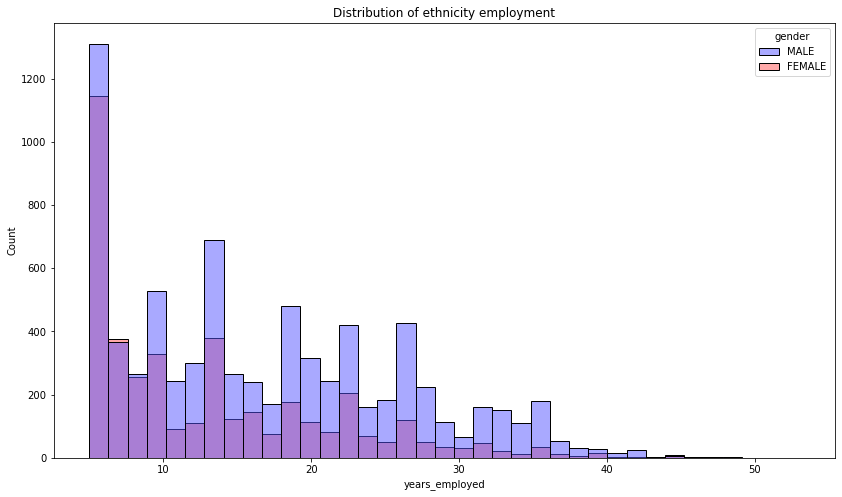

In [9]:

plt.figure(figsize=(14,8))
sns.histplot(data = df, x='years_employed', hue='gender', palette='seismic')

plt.title('Distribution of ethnicity employment')
plt.show()

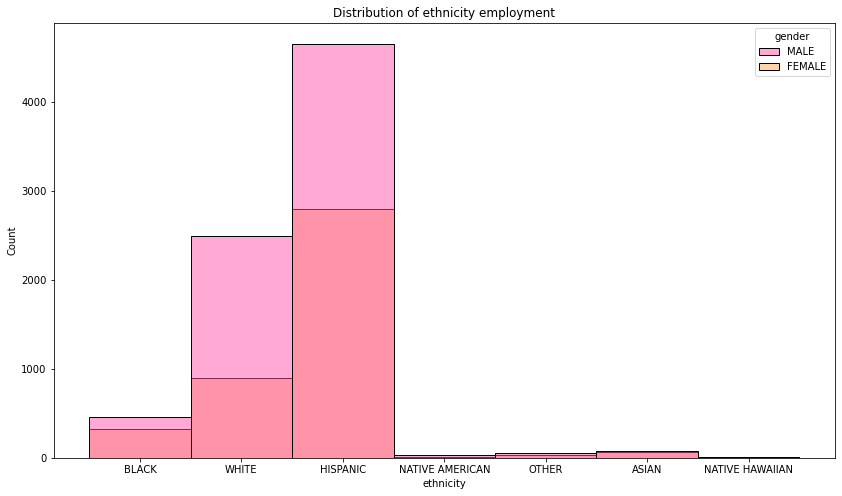

In [10]:
plt.figure(figsize=(14,8))
sns.histplot(data = df, x='ethnicity', hue='gender', palette='spring')

plt.title('Distribution of ethnicity employment')
plt.show()

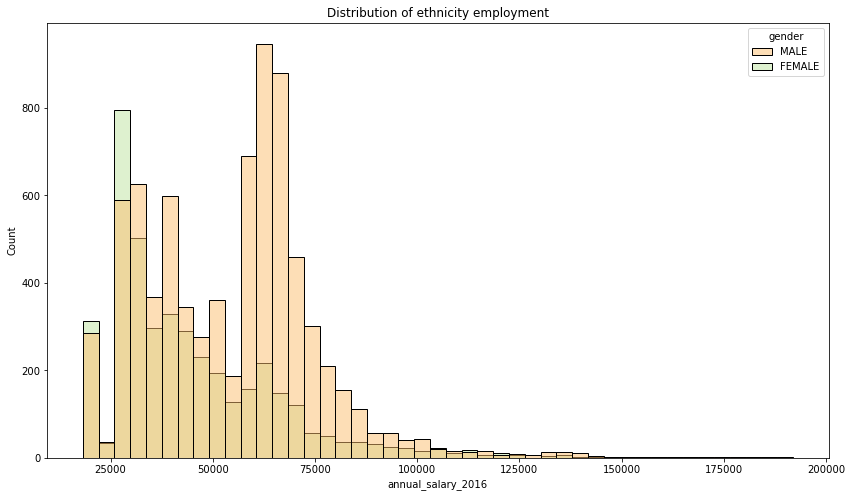

In [11]:

plt.figure(figsize=(14,8))
sns.histplot(data = df, x='annual_salary_2016', hue='gender', palette='Spectral', bins = 45)

plt.title('Distribution of ethnicity employment')
plt.show()

In [12]:
df.loc[df['job_name'] == 'TEMPORARY EMPLOYEE'].total_compensation.median()

4029.0

In [13]:
df.loc[df['annual_salary_2016'] > 150_000].gender.value_counts()

MALE      19
FEMALE     9
Name: gender, dtype: int64

In [14]:
df.loc[df['annual_salary_2016'] < 35_000].gender.value_counts()

FEMALE    1735
MALE      1684
Name: gender, dtype: int64

In [15]:
df.loc[df['annual_salary_2016'] > 150_000].ethnicity.value_counts()

WHITE       15
HISPANIC    10
BLACK        3
Name: ethnicity, dtype: int64

In [16]:
df.loc[df['annual_salary_2016'] > 200_000].ethnicity.value_counts()

Series([], Name: ethnicity, dtype: int64)

In [17]:
df.loc[df['annual_salary_2016'] < 50_000].ethnicity.value_counts()

HISPANIC           4544
WHITE               952
BLACK               465
ASIAN                58
OTHER                38
NATIVE AMERICAN      13
NATIVE HAWAIIAN       6
Name: ethnicity, dtype: int64

In [18]:
df.loc[df['annual_salary_2016'] >= 50_000].ethnicity.value_counts()

HISPANIC           2902
WHITE              2438
BLACK               322
ASIAN                83
OTHER                49
NATIVE AMERICAN      33
NATIVE HAWAIIAN       7
Name: ethnicity, dtype: int64

In [19]:
df.loc[df['annual_salary_2016'] > 100_000].ethnicity.value_counts()

WHITE       160
HISPANIC    106
BLACK        25
ASIAN         8
OTHER         3
Name: ethnicity, dtype: int64

In [20]:
df.ethnicity.value_counts()

HISPANIC           7446
WHITE              3390
BLACK               787
ASIAN               141
OTHER                87
NATIVE AMERICAN      46
NATIVE HAWAIIAN      13
Name: ethnicity, dtype: int64

In [21]:
train, validate, test = train_validate_test_split(df, seed=123)

In [22]:
train.shape, validate.shape, test.shape

((6669, 21), (2859, 21), (2382, 21))

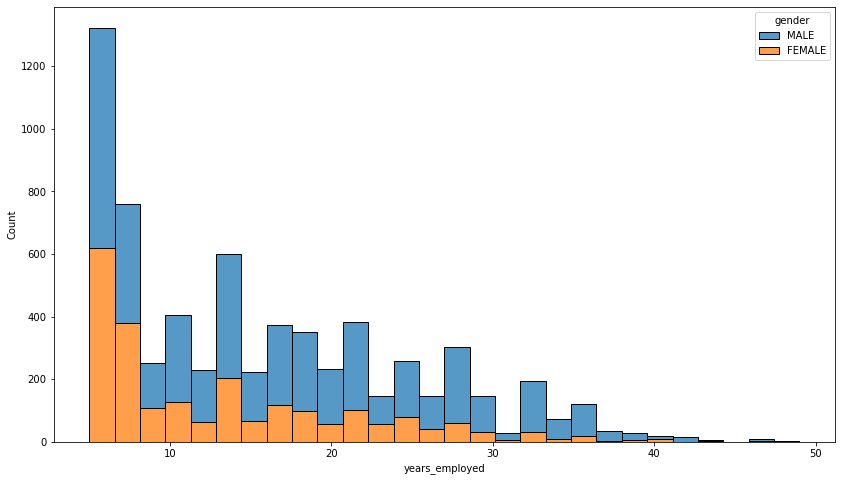

In [23]:
plt.figure(figsize=(14, 8))
sns.histplot(data=train, x="years_employed", hue = "gender", multiple="stack")
plt.show()

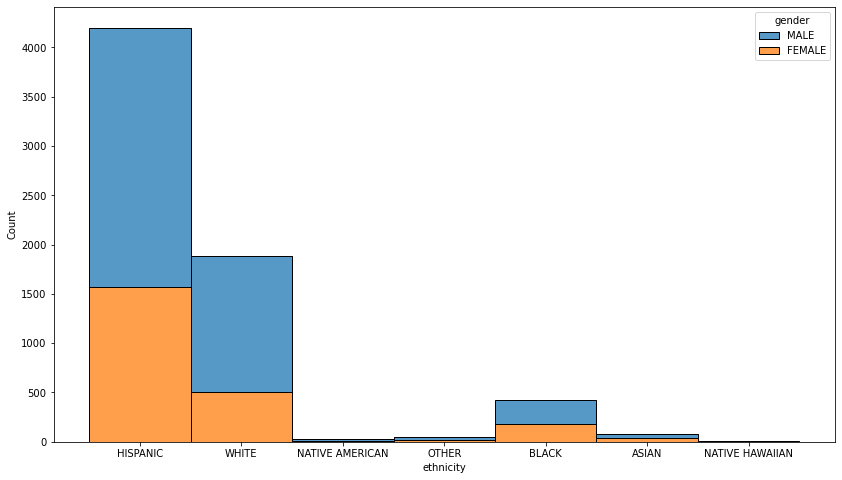

In [24]:
plt.figure(figsize=(14, 8))
sns.histplot(data=train, x="ethnicity", hue = "gender", multiple="stack")
plt.show()

In [25]:
cat_vars = ['ethnicity', 'gender']
quant_vars = ['annual_salary_2016', 'base_pay_2016', 'leave_payout_2016', 'other_2016', 'overtime_2016', 'gross_earnings_2016', 'additional_compensation', 'total_compensation']

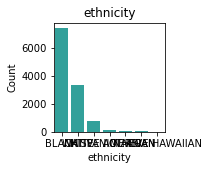

                       ethnicity  Count  Percent
HISPANIC                   BLACK   7446    62.52
WHITE                      WHITE   3390    28.46
BLACK                   HISPANIC    787     6.61
ASIAN            NATIVE AMERICAN    141     1.18
OTHER                      OTHER     87     0.73
NATIVE AMERICAN            ASIAN     46     0.39
NATIVE HAWAIIAN  NATIVE HAWAIIAN     13     0.11
_________________________________________________________________


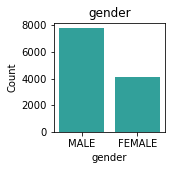

        gender  Count  Percent
MALE      MALE   7777     65.3
FEMALE  FEMALE   4133     34.7
_________________________________________________________________


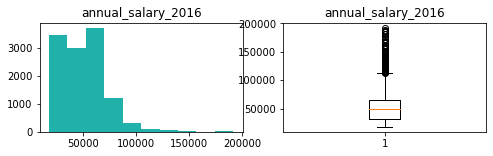

count     11910.000000
mean      51482.081360
std       21571.715401
min       18200.000000
25%       32607.000000
50%       49188.000000
75%       65015.000000
max      191900.000000
Name: annual_salary_2016, dtype: float64


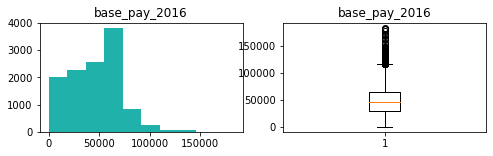

count     11910.000000
mean      46366.063728
std       25722.801945
min           0.000000
25%       30007.250000
50%       46353.500000
75%       64428.000000
max      183056.000000
Name: base_pay_2016, dtype: float64


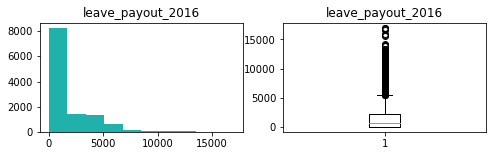

count    11910.000000
mean      1588.026784
std       2202.987712
min          0.000000
25%          0.000000
50%        659.500000
75%       2218.000000
max      16948.000000
Name: leave_payout_2016, dtype: float64


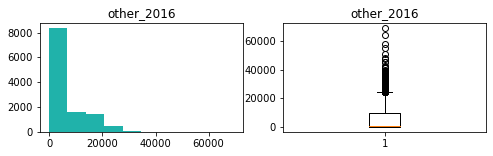

count    11910.000000
mean      5234.605038
std       7496.201979
min       -100.000000
25%         53.000000
50%        822.500000
75%       9807.500000
max      69300.000000
Name: other_2016, dtype: float64


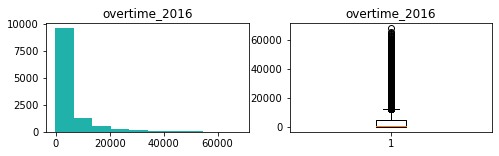

count    11910.000000
mean      4128.983291
std       8164.245184
min       -239.000000
25%          0.000000
50%        359.000000
75%       4718.500000
max      68212.000000
Name: overtime_2016, dtype: float64


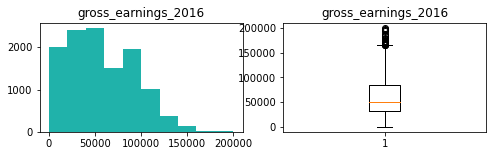

count     11910.000000
mean      57317.670445
std       36264.895738
min           0.000000
25%       32115.000000
50%       51044.000000
75%       85629.500000
max      200099.000000
Name: gross_earnings_2016, dtype: float64


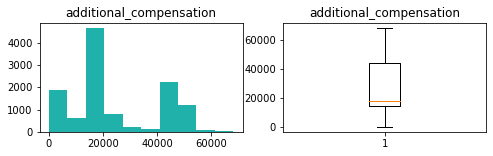

count    11910.000000
mean     24046.723006
std      16837.432205
min          0.000000
25%      14186.250000
50%      17804.000000
75%      44423.000000
max      68257.000000
Name: additional_compensation, dtype: float64


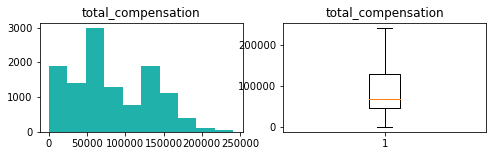

count     11910.000000
mean      81364.377330
std       52090.840869
min           0.000000
25%       46400.750000
50%       68788.000000
75%      127947.750000
max      241289.000000
Name: total_compensation, dtype: float64


In [26]:
explore.explore_univariate(df, cat_vars, quant_vars)

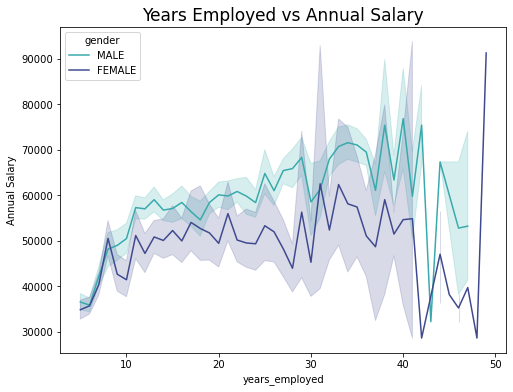

In [27]:
plt.figure('figure', figsize=(8, 6))
plt.title("Years Employed vs Annual Salary", fontsize=17)
ax = sns.lineplot(x="years_employed", y="annual_salary_2016", data=train, hue='gender', palette=sns.color_palette("mako_r", 2))
plt.ylabel('Annual Salary')
plt.show()

Text(0.5, 1.0, 'Ethnicty & Annual Salary Comparison')

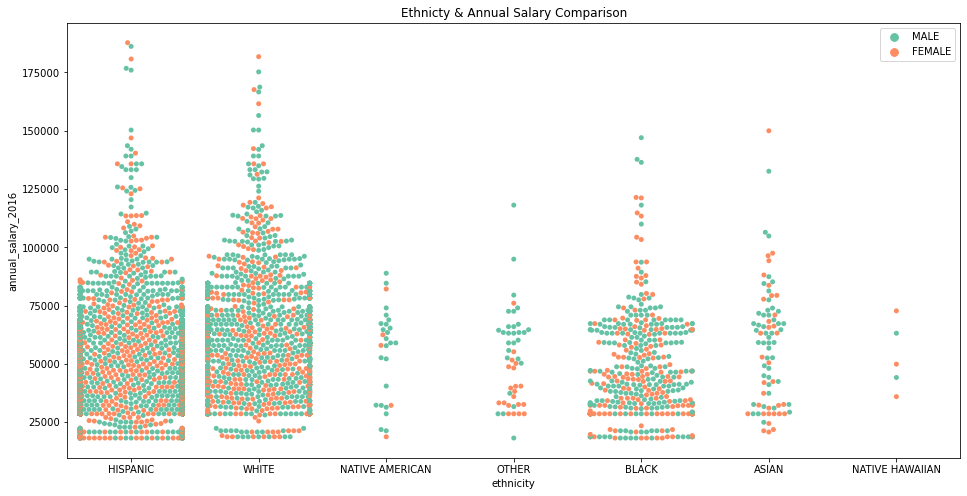

In [28]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="ethnicity", y="annual_salary_2016", data=train, hue="gender", palette="Set2")
plt.legend()
plt.title('Ethnicty & Annual Salary Comparison')

Text(0.5, 1.0, 'Gender & Annual Salary Comparison')

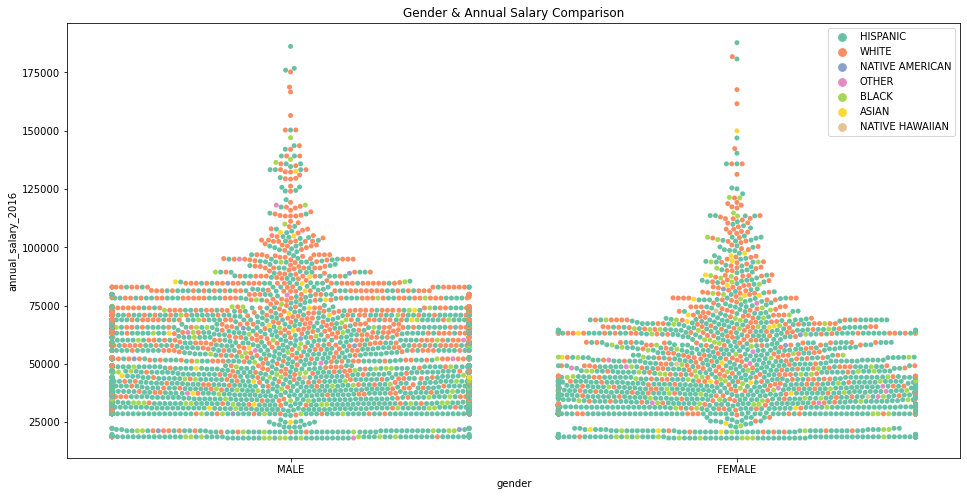

In [29]:
plt.figure(figsize=(16,8))
sns.swarmplot(x='gender', y="annual_salary_2016", data=train, hue="ethnicity", palette="Set2")
plt.legend()
plt.title('Gender & Annual Salary Comparison')

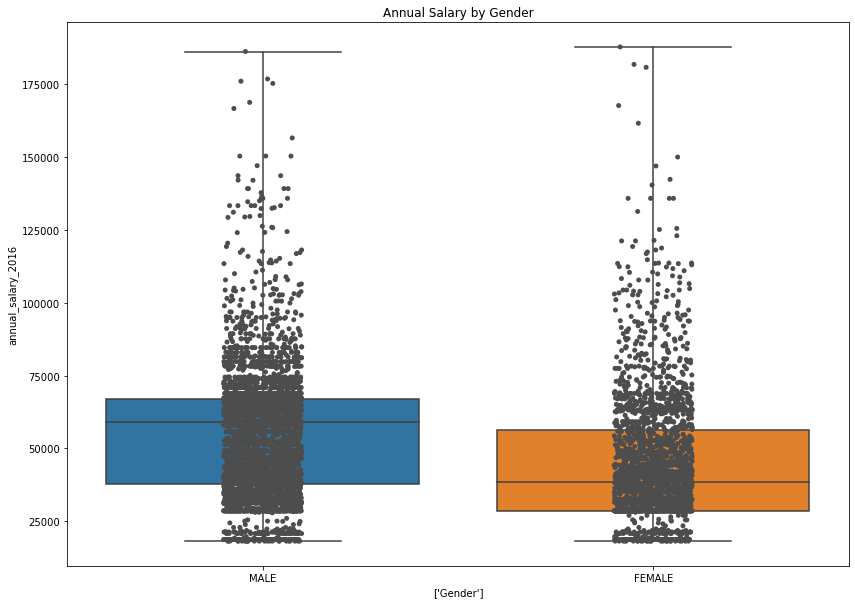

In [30]:

plt.figure(figsize=(14,10))



ax = sns.boxplot(x="gender", y="annual_salary_2016", data=train,whis=np.inf )
ax = sns.stripplot(x="gender", y="annual_salary_2016", data=train, color=".3")
ax.set_xlabel(['Gender'])
plt.title('Annual Salary by Gender')


plt.show()

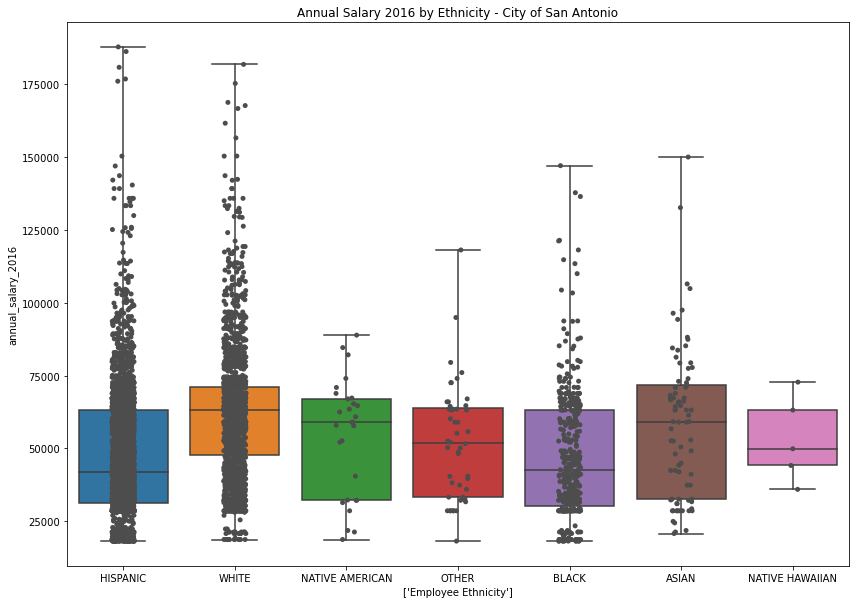

In [31]:
plt.figure(figsize=(14,10))



ax = sns.boxplot(x="ethnicity", y="annual_salary_2016", data=train,whis=np.inf )
ax = sns.stripplot(x="ethnicity", y="annual_salary_2016", data=train, color=".3")
ax.set_xlabel(['Employee Ethnicity'])
plt.title('Annual Salary 2016 by Ethnicity - City of San Antonio')


plt.show()

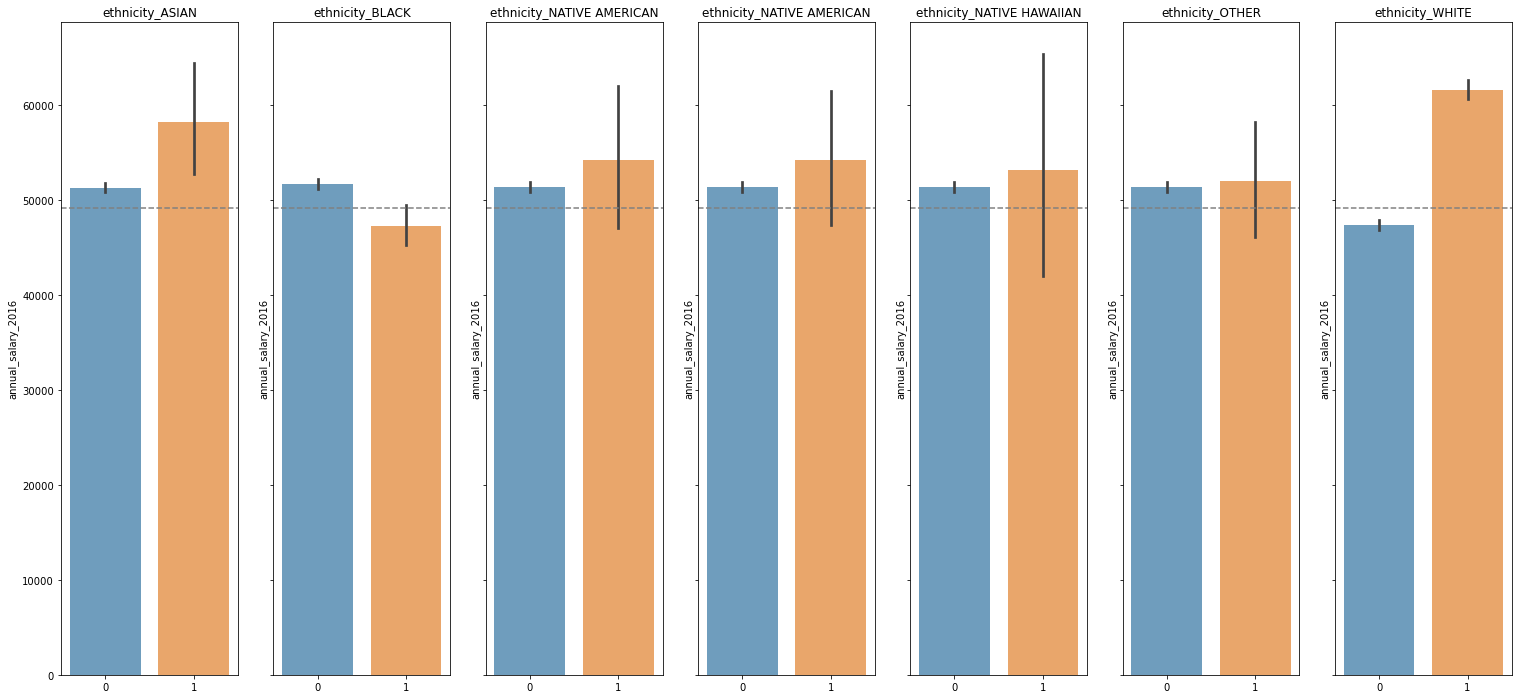

In [32]:
features = ['ethnicity_ASIAN', 'ethnicity_BLACK', 'ethnicity_NATIVE AMERICAN','ethnicity_NATIVE AMERICAN', 'ethnicity_NATIVE HAWAIIAN','ethnicity_OTHER', 'ethnicity_WHITE']

median_salary = train.annual_salary_2016.median()
_, ax = plt.subplots(nrows=1, ncols=7, figsize=(26, 12), sharey=True)
for i, feature in enumerate(features):
    sns.barplot(feature, 'annual_salary_2016', data=train, ax=ax[i], alpha=0.7)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('annual_salary_2016')
    ax[i].set_title(feature)
    ax[i].axhline(median_salary, ls='--', color='grey')

In [33]:
# cross tab churn vs having Fiber Optic Internet
observed = pd.crosstab(train.gender, train.annual_salary_2016)
observed

annual_salary_2016,18200.0,18720.0,18741.0,18750.0,19240.0,19760.0,20800.0,21230.0,21307.0,21320.0,...,166650.0,167665.0,168747.0,175267.0,176014.0,176788.0,180790.0,181800.0,186206.0,187788.0
gender,,,,,,,,,,,,,,,,,,,,,
FEMALE,27,31,58,7,7,6,23,0,1,22,...,0,1,0,0,0,0,1,1,0,1
MALE,25,24,41,7,5,2,32,1,1,29,...,1,0,1,1,1,1,0,0,1,0


In [34]:
# Set our alpha
alpha = .05

In [35]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [36]:
null_hypothesis = "Gender is independent of annual salary"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Gender is independent of annual salary
1.869665108808703e-129


In [37]:
# cross ethnicity vs gender
observed = pd.crosstab(train.gender, train.ethnicity)
observed

ethnicity,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,NATIVE HAWAIIAN,OTHER,WHITE
gender,,,,,,,
FEMALE,34,185,1565,5,3,20,502
MALE,47,242,2635,23,2,28,1378


In [38]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [39]:
null_hypothesis = "Gender is independent of ethnicity"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Gender is independent of ethnicity
1.2125612461333687e-16


In [40]:
# cross tab churn vs having Fiber Optic Internet
observed = pd.crosstab(train.gender, train.department)
observed

department,ANIMAL CARE SERVICES,AVIATION,BUILDING & EQUIPMENT SERVICES,CENTER CITY DEVELOPMENT & OPERATIONS,CITY ATTORNEY,CITY AUDITOR,CITY MANAGER'S OFFICE,CONVENTION & SPORTS FACILITIES,CONVENTION AND VISITORS BUREAU,DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT,...,OFFICE HISTORIC PRESERVATION,OFFICE OF INNOVATION,OFFICE OF THE CITY CLERK,PARKS AND RECREATION,PLANNING AND COMMUNITY DEV,POLICE,PRE K 4 SA,SA METRO HEALTH DISTRICT,SOLID WASTE MANAGEMENT,TRANSPORTATION & CAPITAL IMPROV
gender,,,,,,,,,,,,,,,,,,,,,
FEMALE,36,73,30,36,28,5,3,54,34,5,...,6,2,11,90,19,412,252,135,34,70
MALE,26,184,60,50,15,8,1,106,11,2,...,4,2,6,262,10,1259,27,39,306,363


In [41]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [42]:
null_hypothesis = "Gender is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Gender is independent of department worked in
0.0


In [43]:
# cross tab churn vs having Fiber Optic Internet
observed = pd.crosstab(train.ethnicity, train.department)
observed

department,ANIMAL CARE SERVICES,AVIATION,BUILDING & EQUIPMENT SERVICES,CENTER CITY DEVELOPMENT & OPERATIONS,CITY ATTORNEY,CITY AUDITOR,CITY MANAGER'S OFFICE,CONVENTION & SPORTS FACILITIES,CONVENTION AND VISITORS BUREAU,DEPARTMENT FOR CULTURE & CREATIVE DEVELOPMENT,...,OFFICE HISTORIC PRESERVATION,OFFICE OF INNOVATION,OFFICE OF THE CITY CLERK,PARKS AND RECREATION,PLANNING AND COMMUNITY DEV,POLICE,PRE K 4 SA,SA METRO HEALTH DISTRICT,SOLID WASTE MANAGEMENT,TRANSPORTATION & CAPITAL IMPROV
ethnicity,,,,,,,,,,,,,,,,,,,,,
ASIAN,2,8,0,3,3,0,0,2,0,0,...,0,0,0,2,0,13,2,3,1,4
BLACK,4,21,1,5,1,1,1,11,1,0,...,1,0,3,22,3,91,30,27,37,11
HISPANIC,35,136,81,61,22,5,3,122,29,3,...,3,1,11,255,18,955,202,109,275,336
NATIVE AMERICAN,0,1,1,1,0,0,0,1,0,0,...,0,0,0,1,0,5,1,0,0,2
NATIVE HAWAIIAN,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
OTHER,1,4,0,2,0,0,0,1,0,0,...,0,0,0,2,0,9,1,5,2,1
WHITE,20,86,7,14,16,7,0,22,15,4,...,6,3,3,70,8,597,43,30,25,79


In [44]:
# .chi2_contingency returns 4 different values
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [45]:
null_hypothesis = "Ethnicity is independent of department worked in"

if p < alpha:
    
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the hypothesis that Ethnicity is independent of department worked in
3.0006657867591775e-114


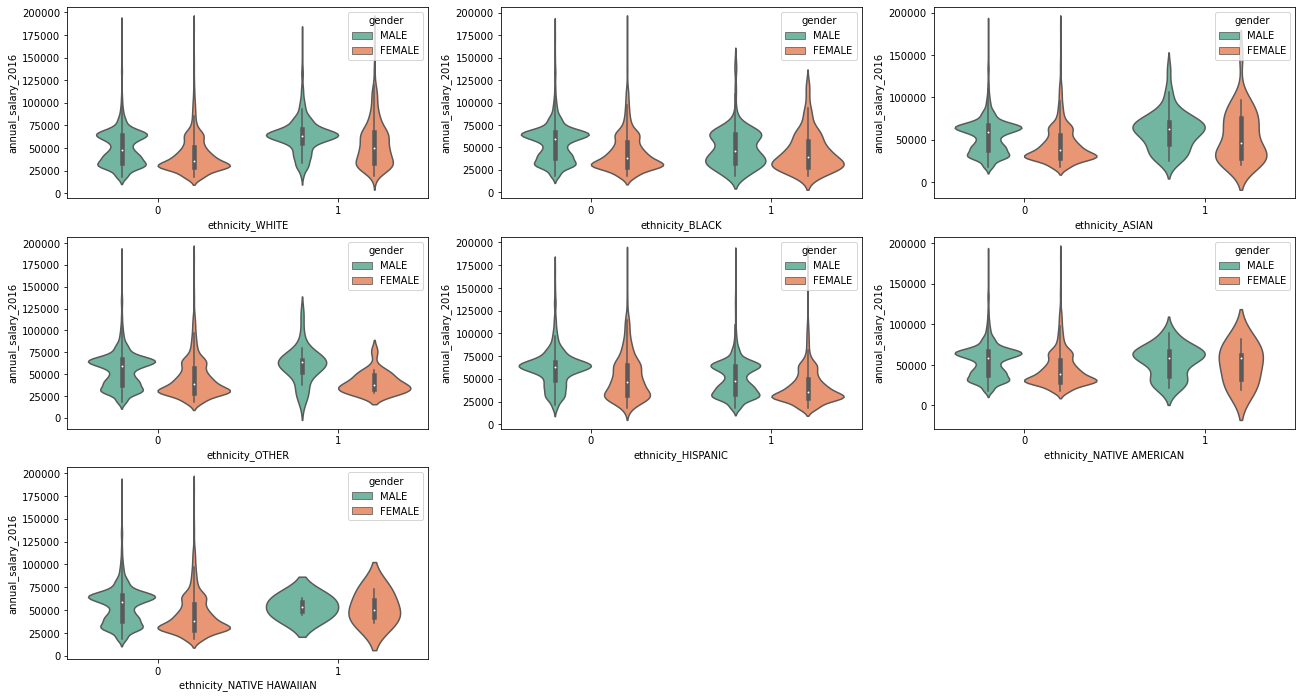

In [46]:
plt.figure(figsize = (22,12))

plt.subplot(331)
sns.violinplot(x='ethnicity_WHITE', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(332)
sns.violinplot(x='ethnicity_BLACK', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(333)
sns.violinplot(x='ethnicity_ASIAN', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(334)
sns.violinplot(x='ethnicity_OTHER', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(335)
sns.violinplot(x='ethnicity_HISPANIC', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(336)
sns.violinplot(x='ethnicity_NATIVE AMERICAN', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.subplot(337)
sns.violinplot(x='ethnicity_NATIVE HAWAIIAN', y='annual_salary_2016',hue='gender', data=train, palette="Set2")

plt.show()

In [47]:
dept_median_sal = df.groupby(['department', 'gender']).annual_salary_2016.median().reset_index(name='median_salary')

array([[<AxesSubplot:title={'center':'median_salary'}>]], dtype=object)

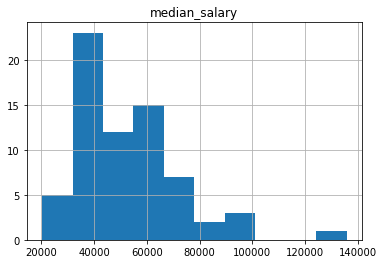

In [48]:
dept_median_sal.hist()

In [63]:
df2 = df.groupby(['department', 'gender', 'ethnicity' ]).annual_salary_2016.median().reset_index(name='median_salary')

In [64]:
df2.head()

,department,gender,ethnicity,median_salary
0,ANIMAL CARE SERVICES,FEMALE,ASIAN,31831.0
1,ANIMAL CARE SERVICES,FEMALE,HISPANIC,34980.0
2,ANIMAL CARE SERVICES,FEMALE,OTHER,40469.0
3,ANIMAL CARE SERVICES,FEMALE,WHITE,35268.0
4,ANIMAL CARE SERVICES,MALE,BLACK,30187.5


In [65]:
df3 = df.groupby(['department', 'gender', 'ethnicity']).ethnicity.count().reset_index(name='employee_count')

In [66]:
df4 = pd.merge(df2, df3, how='left', on=['department', 'gender', 'ethnicity'], suffixes=['', '_'])
cols = ['department', 'gender', 'ethnicity', 'median_salary', 'employee_count']
df4 = df4[cols]

In [68]:
df4.head(5)

,department,gender,ethnicity,median_salary,employee_count
0,ANIMAL CARE SERVICES,FEMALE,ASIAN,31831.0,2
1,ANIMAL CARE SERVICES,FEMALE,HISPANIC,34980.0,37
2,ANIMAL CARE SERVICES,FEMALE,OTHER,40469.0,1
3,ANIMAL CARE SERVICES,FEMALE,WHITE,35268.0,31
4,ANIMAL CARE SERVICES,MALE,BLACK,30187.5,4


created two new data frames to help see what the median salary was for male and females in each department

I then created another data frame to see what the median salary was for males and females in each department by ethnicity

finally, I merged the two new data frames together to have one to use for future visualization, exploration

<AxesSubplot:xlabel='ethnicity', ylabel='median_salary'>

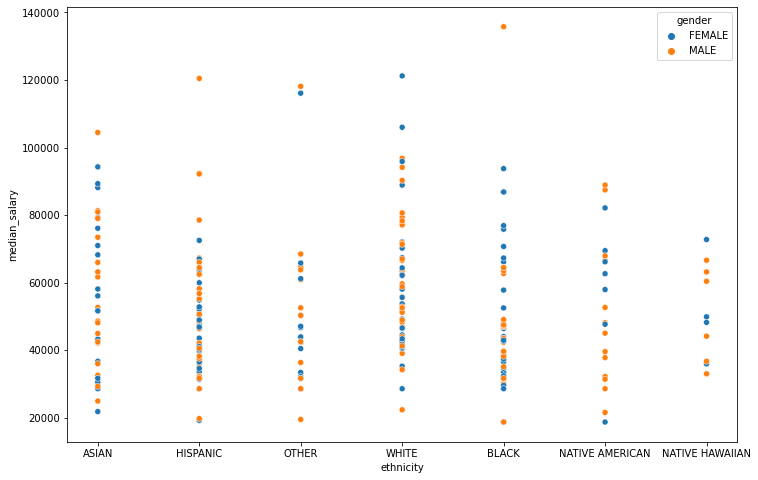

In [54]:

plt.figure(figsize=(12,8))
sns.scatterplot(x='ethnicity', y='median_salary',
               data=df2, hue='gender')

<AxesSubplot:xlabel='department', ylabel='annual_salary_2016'>

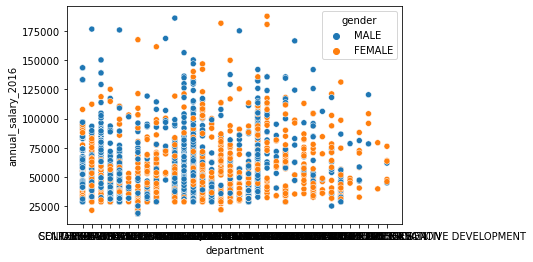

In [55]:


sns.scatterplot(x='department', y='annual_salary_2016',
               data=train, hue='gender')